In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import warnings
warnings.filterwarnings('ignore')

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

print("ÌÅ¥Î¶≠Ïä§Ìä∏Î¶º Î∂ÑÏÑùÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎìú ÏôÑÎ£å")


In [27]:
# ÌÅ¥Î¶≠Ïä§Ìä∏Î¶º Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from collections import Counter, defaultdict
import warnings
warnings.filterwarnings('ignore')

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

print("ÎùºÏù¥Î∏åÎü¨Î¶¨ import ÏôÑÎ£å!")


ÎùºÏù¥Î∏åÎü¨Î¶¨ import ÏôÑÎ£å!


In [28]:
# Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv(r'C:\Users\young\Downloads\38w__clickstream.csv')

# Ïª¨ÎüºÎ™ÖÏùÑ ÏÜåÎ¨∏ÏûêÎ°ú Î≥ÄÍ≤Ω
df.columns = [col.lower() for col in df.columns]

# event_dttmÏùÑ datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['event_dttm'] = pd.to_datetime(df['event_dttm'])

print("=== Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===")
print(f"Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df.shape}")
print(f"Ïª¨ÎüºÎ™Ö: {list(df.columns)}")
print(f"ÎÇ†Ïßú Î≤îÏúÑ: {df['event_dt'].min()} ~ {df['event_dt'].max()}")
print(f"Í≥†Ïú† ÏÇ¨Ïö©Ïûê Ïàò: {df['user_seq'].nunique()}")
print(f"Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖ Ïàò: {df['event_type'].nunique()}")

print("\n=== Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞ ===")
print(df.head(10))


=== Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===
Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (548779, 5)
Ïª¨ÎüºÎ™Ö: ['event_dt', 'user_seq', 'event_type', 'event_dttm', 'rn']
ÎÇ†Ïßú Î≤îÏúÑ: 2025-09-08 ~ 2025-09-19
Í≥†Ïú† ÏÇ¨Ïö©Ïûê Ïàò: 43181
Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖ Ïàò: 12

=== Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞ ===
     event_dt  user_seq event_type              event_dttm  rn
0  2025-09-08    9465.0       QUIZ 2025-09-08 18:35:12.554   5
1  2025-09-08    3527.0       QUIZ 2025-09-08 21:49:30.175   6
2  2025-09-08   26192.0       CARD 2025-09-08 18:36:20.229   4
3  2025-09-08  132495.0       QUIZ 2025-09-08 20:00:58.754   2
4  2025-09-08   60730.0       CARD 2025-09-08 22:20:14.074   5
5  2025-09-08  139154.0       CARD 2025-09-08 21:44:33.066   4
6  2025-09-09   38077.0    COUPANG 2025-09-09 05:29:48.784   3
7  2025-09-08   15370.0       CARD 2025-09-08 20:43:08.114   6
8  2025-09-08    1731.0       QUIZ 2025-09-08 17:16:18.337   9
9  2025-09-08   33270.0       QUIZ 2025-09-08 22:31:05.408   5


=== Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖÎ≥Ñ ÎπàÎèÑ ===
event_type
WALK           131482
LOTTO_OTHER     93762
RAFFLE          77981
CHG             77981
QUIZ            61095
LOTTO_AD        38615
COUPANG         27448
CARD            26483
STRETCHING      11803
BUZZVILL         1832
LIKE              241
FOLLOW             56
Name: count, dtype: int64


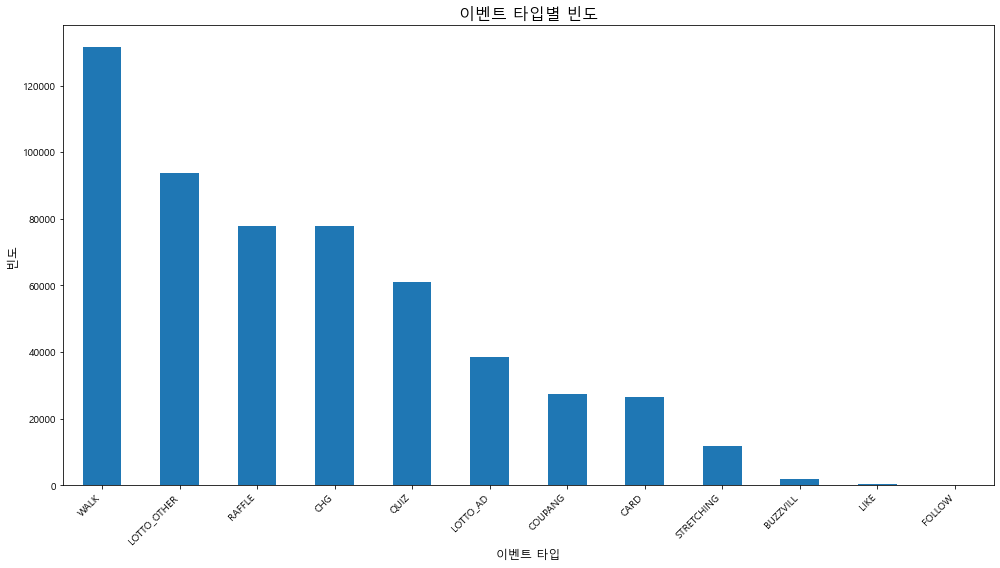


=== ÏÉÅÏúÑ Ïù¥Î≤§Ìä∏ ÎπÑÏú® ===
1. WALK: 131,482Ìöå (24.0%)
2. LOTTO_OTHER: 93,762Ìöå (17.1%)
3. RAFFLE: 77,981Ìöå (14.2%)
4. CHG: 77,981Ìöå (14.2%)
5. QUIZ: 61,095Ìöå (11.1%)


In [29]:
# 1. Í∏∞Î≥∏ Îç∞Ïù¥ÌÑ∞ ÌÉêÏÉâ
print("=== Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖÎ≥Ñ ÎπàÎèÑ ===")
event_counts = df['event_type'].value_counts()
print(event_counts)

# Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖÎ≥Ñ ÎπàÎèÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
event_counts.plot(kind='bar')
plt.title('Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖÎ≥Ñ ÎπàÎèÑ', fontsize=16)
plt.xlabel('Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖ', fontsize=12)
plt.ylabel('ÎπàÎèÑ', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ÏÉÅÏúÑ Ïù¥Î≤§Ìä∏Îì§Ïùò ÎπÑÏú® Í≥ÑÏÇ∞
print("\n=== ÏÉÅÏúÑ Ïù¥Î≤§Ìä∏ ÎπÑÏú® ===")
total_events = len(df)
for i, (event, count) in enumerate(event_counts.head(5).items()):
    percentage = (count / total_events) * 100
    print(f"{i+1}. {event}: {count:,}Ìöå ({percentage:.1f}%)")


=== ÏÇ¨Ïö©ÏûêÎ≥Ñ ÏãúÌÄÄÏä§ Î∂ÑÏÑù (ÎÇ†ÏßúÎ≥Ñ ÏÑ∏ÏÖò Î∂ÑÎ¶¨) ===
Ï¥ù ÏÑ∏ÏÖò Ïàò: 162,558
Í≥†Ïú† ÏÇ¨Ïö©Ïûê Ïàò: 43,181
ÌèâÍ∑† ÏãúÌÄÄÏä§ Í∏∏Ïù¥: 3.38
ÏµúÎåÄ ÏãúÌÄÄÏä§ Í∏∏Ïù¥: 12
ÏµúÏÜå ÏãúÌÄÄÏä§ Í∏∏Ïù¥: 2


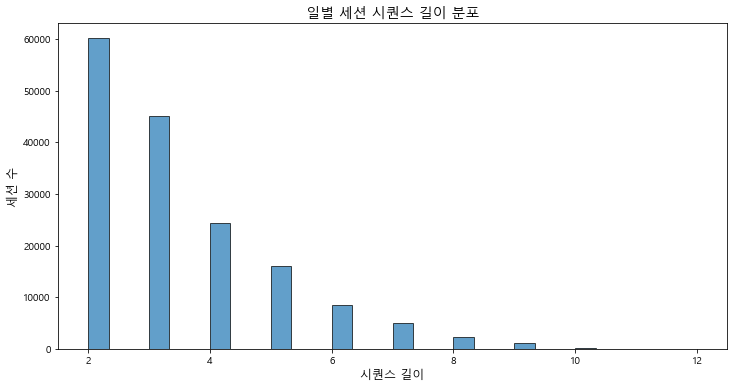


=== ÏãúÌÄÄÏä§ Í∏∏Ïù¥ ÌÜµÍ≥Ñ ===
count    162558.000000
mean          3.375897
std           1.546608
min           2.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          12.000000
Name: sequence_length, dtype: float64

=== ÏÇ¨Ïö©ÏûêÎ≥Ñ ÏÑ∏ÏÖò Ïàò Î∂ÑÏÑù ===
ÌèâÍ∑† ÏÑ∏ÏÖò Ïàò: 3.76
ÏµúÎåÄ ÏÑ∏ÏÖò Ïàò: 12
ÏµúÏÜå ÏÑ∏ÏÖò Ïàò: 1


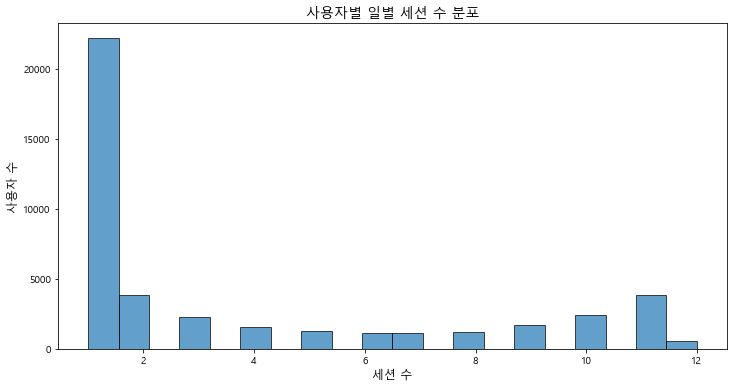


=== ÏÉòÌîå ÏùºÎ≥Ñ ÏÑ∏ÏÖò ÏãúÌÄÄÏä§ ===
ÏÇ¨Ïö©Ïûê 1.0 (2025-09-08): RAFFLE -> CHG -> CARD -> STRETCHING -> COUPANG...
ÏÇ¨Ïö©Ïûê 2.0 (2025-09-08): COUPANG -> QUIZ -> CARD -> BUZZVILL...
ÏÇ¨Ïö©Ïûê 2.0 (2025-09-09): STRETCHING -> CARD -> WALK -> RAFFLE -> CHG...
ÏÇ¨Ïö©Ïûê 2.0 (2025-09-11): STRETCHING -> QUIZ -> COUPANG...
ÏÇ¨Ïö©Ïûê 2.0 (2025-09-12): STRETCHING -> QUIZ -> CARD...

=== ÎÇ†ÏßúÎ≥Ñ ÏÑ∏ÏÖò Ïàò Î∂ÑÏÑù ===
date
2025-09-08    11313
2025-09-09    16142
2025-09-10    15720
2025-09-11    15060
2025-09-12    14814
2025-09-13    13701
2025-09-14    15084
2025-09-15    13767
2025-09-16    14141
2025-09-17    14425
2025-09-18    15880
2025-09-19     2511
dtype: int64


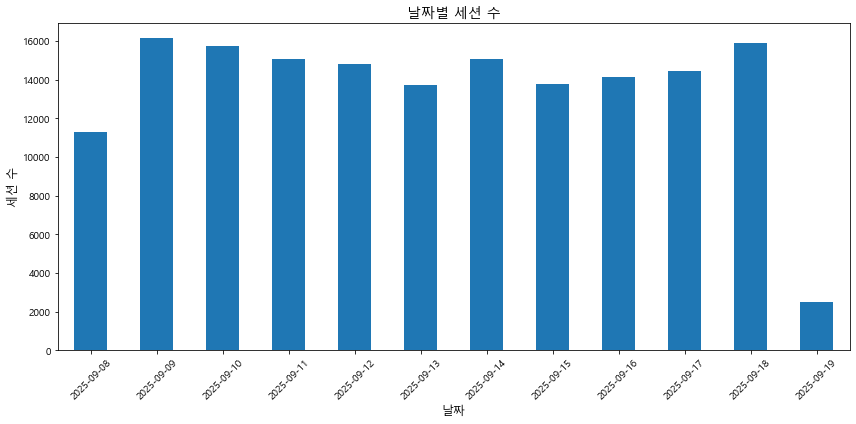


=== Í∏∞Ï°¥ Î∞©Ïãù vs ÎÇ†ÏßúÎ≥Ñ Î∂ÑÎ¶¨ Î∞©Ïãù ÎπÑÍµê ===
Í∏∞Ï°¥ Î∞©Ïãù (Ï†ÑÏ≤¥ ÏãúÌÄÄÏä§): 43,181Í∞ú
ÎÇ†ÏßúÎ≥Ñ Î∂ÑÎ¶¨ Î∞©Ïãù: 162,558Í∞ú
Ï∞®Ïù¥: 119,377Í∞ú


In [70]:
# 2. ÏÇ¨Ïö©ÏûêÎ≥Ñ ÏãúÌÄÄÏä§ Î∂ÑÏÑù (ÎÇ†ÏßúÎ≥Ñ ÏÑ∏ÏÖò Î∂ÑÎ¶¨)
print("=== ÏÇ¨Ïö©ÏûêÎ≥Ñ ÏãúÌÄÄÏä§ Î∂ÑÏÑù (ÎÇ†ÏßúÎ≥Ñ ÏÑ∏ÏÖò Î∂ÑÎ¶¨) ===")

# ÏÇ¨Ïö©ÏûêÎ≥ÑÎ°ú Ïù¥Î≤§Ìä∏Î•º ÏãúÍ∞Ñ ÏàúÏúºÎ°ú Ï†ïÎ†¨
df_sorted = df.sort_values(['user_seq', 'event_dttm'])

# ÎÇ†ÏßúÎ≥ÑÎ°ú ÏÑ∏ÏÖòÏùÑ Î∂ÑÎ¶¨ÌïòÏó¨ ÏãúÌÄÄÏä§ ÏÉùÏÑ±
def create_daily_sequences(df):
    """ÎÇ†ÏßúÎ≥ÑÎ°ú ÏÑ∏ÏÖòÏùÑ Î∂ÑÎ¶¨ÌïòÏó¨ ÏãúÌÄÄÏä§ ÏÉùÏÑ±"""
    sequences = []
    
    for user_id in df['user_seq'].unique():
        user_data = df[df['user_seq'] == user_id].copy()
        
        # ÎÇ†ÏßúÎ≥ÑÎ°ú Í∑∏Î£πÌôî
        for date in user_data['event_dt'].unique():
            daily_events = user_data[user_data['event_dt'] == date].sort_values('event_dttm')
            
            if len(daily_events) > 0:
                sequence = daily_events['event_type'].tolist()
                sequences.append({
                    'user_seq': user_id,
                    'date': date,
                    'event_sequence': sequence,
                    'sequence_length': len(sequence),
                    'start_time': daily_events['event_dttm'].min(),
                    'end_time': daily_events['event_dttm'].max()
                })
    
    return pd.DataFrame(sequences)

# ÎÇ†ÏßúÎ≥Ñ ÏãúÌÄÄÏä§ ÏÉùÏÑ±
daily_sequences = create_daily_sequences(df_sorted)

print(f"Ï¥ù ÏÑ∏ÏÖò Ïàò: {len(daily_sequences):,}")
print(f"Í≥†Ïú† ÏÇ¨Ïö©Ïûê Ïàò: {daily_sequences['user_seq'].nunique():,}")
print(f"ÌèâÍ∑† ÏãúÌÄÄÏä§ Í∏∏Ïù¥: {daily_sequences['sequence_length'].mean():.2f}")
print(f"ÏµúÎåÄ ÏãúÌÄÄÏä§ Í∏∏Ïù¥: {daily_sequences['sequence_length'].max()}")
print(f"ÏµúÏÜå ÏãúÌÄÄÏä§ Í∏∏Ïù¥: {daily_sequences['sequence_length'].min()}")

# ÏãúÌÄÄÏä§ Í∏∏Ïù¥ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.hist(daily_sequences['sequence_length'], bins=30, alpha=0.7, edgecolor='black')
plt.title('ÏùºÎ≥Ñ ÏÑ∏ÏÖò ÏãúÌÄÄÏä§ Í∏∏Ïù¥ Î∂ÑÌè¨', fontsize=14)
plt.xlabel('ÏãúÌÄÄÏä§ Í∏∏Ïù¥', fontsize=12)
plt.ylabel('ÏÑ∏ÏÖò Ïàò', fontsize=12)
plt.show()

# ÏãúÌÄÄÏä§ Í∏∏Ïù¥ ÌÜµÍ≥Ñ
print("\n=== ÏãúÌÄÄÏä§ Í∏∏Ïù¥ ÌÜµÍ≥Ñ ===")
print(daily_sequences['sequence_length'].describe())

# ÏÇ¨Ïö©ÏûêÎ≥Ñ ÏÑ∏ÏÖò Ïàò Î∂ÑÏÑù
user_session_counts = daily_sequences.groupby('user_seq').size()
print(f"\n=== ÏÇ¨Ïö©ÏûêÎ≥Ñ ÏÑ∏ÏÖò Ïàò Î∂ÑÏÑù ===")
print(f"ÌèâÍ∑† ÏÑ∏ÏÖò Ïàò: {user_session_counts.mean():.2f}")
print(f"ÏµúÎåÄ ÏÑ∏ÏÖò Ïàò: {user_session_counts.max()}")
print(f"ÏµúÏÜå ÏÑ∏ÏÖò Ïàò: {user_session_counts.min()}")

# ÏÑ∏ÏÖò Ïàò Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.hist(user_session_counts, bins=20, alpha=0.7, edgecolor='black')
plt.title('ÏÇ¨Ïö©ÏûêÎ≥Ñ ÏùºÎ≥Ñ ÏÑ∏ÏÖò Ïàò Î∂ÑÌè¨', fontsize=14)
plt.xlabel('ÏÑ∏ÏÖò Ïàò', fontsize=12)
plt.ylabel('ÏÇ¨Ïö©Ïûê Ïàò', fontsize=12)
plt.show()

# Î™á Í∞úÏùò ÏÉòÌîå ÏãúÌÄÄÏä§ Ï∂úÎ†•
print("\n=== ÏÉòÌîå ÏùºÎ≥Ñ ÏÑ∏ÏÖò ÏãúÌÄÄÏä§ ===")
for i in range(5):
    row = daily_sequences.iloc[i]
    print(f"ÏÇ¨Ïö©Ïûê {row['user_seq']} ({row['date']}): {' -> '.join(row['event_sequence'][:10])}...")

# ÎÇ†ÏßúÎ≥Ñ ÏÑ∏ÏÖò Ïàò Î∂ÑÏÑù
print("\n=== ÎÇ†ÏßúÎ≥Ñ ÏÑ∏ÏÖò Ïàò Î∂ÑÏÑù ===")
daily_session_counts = daily_sequences.groupby('date').size()
print(daily_session_counts)

# ÎÇ†ÏßúÎ≥Ñ ÏÑ∏ÏÖò Ïàò ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
daily_session_counts.plot(kind='bar')
plt.title('ÎÇ†ÏßúÎ≥Ñ ÏÑ∏ÏÖò Ïàò', fontsize=14)
plt.xlabel('ÎÇ†Ïßú', fontsize=12)
plt.ylabel('ÏÑ∏ÏÖò Ïàò', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Í∏∞Ï°¥ Î∞©ÏãùÍ≥º ÎπÑÍµê
print("\n=== Í∏∞Ï°¥ Î∞©Ïãù vs ÎÇ†ÏßúÎ≥Ñ Î∂ÑÎ¶¨ Î∞©Ïãù ÎπÑÍµê ===")
print(f"Í∏∞Ï°¥ Î∞©Ïãù (Ï†ÑÏ≤¥ ÏãúÌÄÄÏä§): {len(df_sorted.groupby('user_seq').size()):,}Í∞ú")
print(f"ÎÇ†ÏßúÎ≥Ñ Î∂ÑÎ¶¨ Î∞©Ïãù: {len(daily_sequences):,}Í∞ú")
print(f"Ï∞®Ïù¥: {len(daily_sequences) - len(df_sorted.groupby('user_seq').size()):,}Í∞ú")

# user_sequences Î≥ÄÏàòÎ•º ÎÇ†ÏßúÎ≥Ñ ÏãúÌÄÄÏä§Î°ú ÏóÖÎç∞Ïù¥Ìä∏ (Îã§Ïùå Î∂ÑÏÑùÏóêÏÑú ÏÇ¨Ïö©)
user_sequences = daily_sequences[['user_seq', 'event_sequence']].copy()


In [71]:
# 3. Ïù¥Î≤§Ìä∏ Ï†ÑÏù¥ ÌñâÎ†¨ ÏÉùÏÑ±
print("=== Ïù¥Î≤§Ìä∏ Ï†ÑÏù¥ ÌñâÎ†¨ Î∂ÑÏÑù ===")

# Î™®Îì† Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖ ÏàòÏßë
all_events = df['event_type'].unique()
transition_counts = pd.DataFrame(0, index=all_events, columns=all_events)

# Í∞Å ÏÇ¨Ïö©ÏûêÏùò ÏãúÌÄÄÏä§ÏóêÏÑú Ï†ÑÏù¥ Ïπ¥Ïö¥Ìä∏
for _, row in user_sequences.iterrows():
    sequence = row['event_sequence']
    for i in range(len(sequence) - 1):
        from_event = sequence[i]
        to_event = sequence[i + 1]
        transition_counts.loc[from_event, to_event] += 1

print("Ï†ÑÏù¥ ÌöüÏàò ÌñâÎ†¨ (ÏÉÅÏúÑ 10x10):")
print(transition_counts.iloc[:10, :10])

# Ï†ÑÏù¥ ÌôïÎ•† Í≥ÑÏÇ∞
transition_probs = transition_counts.div(transition_counts.sum(axis=1), axis=0).fillna(0)
print("\nÏ†ÑÏù¥ ÌôïÎ•† ÌñâÎ†¨ (ÏÉÅÏúÑ 10x10):")
print(transition_probs.iloc[:10, :10].round(3))

# Í∞ÄÏû• Í∞ïÌïú Ï†ÑÏù¥Îì§ Ï∞æÍ∏∞
print("\n=== Í∞ÄÏû• Í∞ïÌïú Ï†ÑÏù¥ (ÏÉÅÏúÑ 10Í∞ú) ===")
strong_transitions = transition_probs.stack().sort_values(ascending=False)
for i, ((from_event, to_event), prob) in enumerate(strong_transitions.head(10).items()):
    if prob > 0:
        print(f"{i+1}. {from_event} ‚Üí {to_event}: {prob:.3f}")


=== Ïù¥Î≤§Ìä∏ Ï†ÑÏù¥ ÌñâÎ†¨ Î∂ÑÏÑù ===
Ï†ÑÏù¥ ÌöüÏàò ÌñâÎ†¨ (ÏÉÅÏúÑ 10x10):
             QUIZ   CARD  COUPANG  STRETCHING  LIKE  FOLLOW  BUZZVILL   WALK  \
QUIZ            0  19916     3879        1589    13       1        74  16087   
CARD         1204      0     2792        1595    70       6       141   8495   
COUPANG      3950    867        0        2328    21       1       925   5162   
STRETCHING   1302    399     4023           0    11       2       177   1672   
LIKE           17      7       13          17     0      28         5     46   
FOLLOW          6      1        3           2    11       0         1      6   
BUZZVILL       85     43      132         116     5       1         0    226   
WALK        12199   1705     4356        1564    24       5       174      0   
RAFFLE          0      0        0           0     0       0         0      0   
CHG          4749    819     2043         726    23       2        99   9200   

            RAFFLE    CHG  
QUIZ          1

=== Ï†ÑÏù¥ ÌôïÎ•† ÌûàÌä∏Îßµ ===


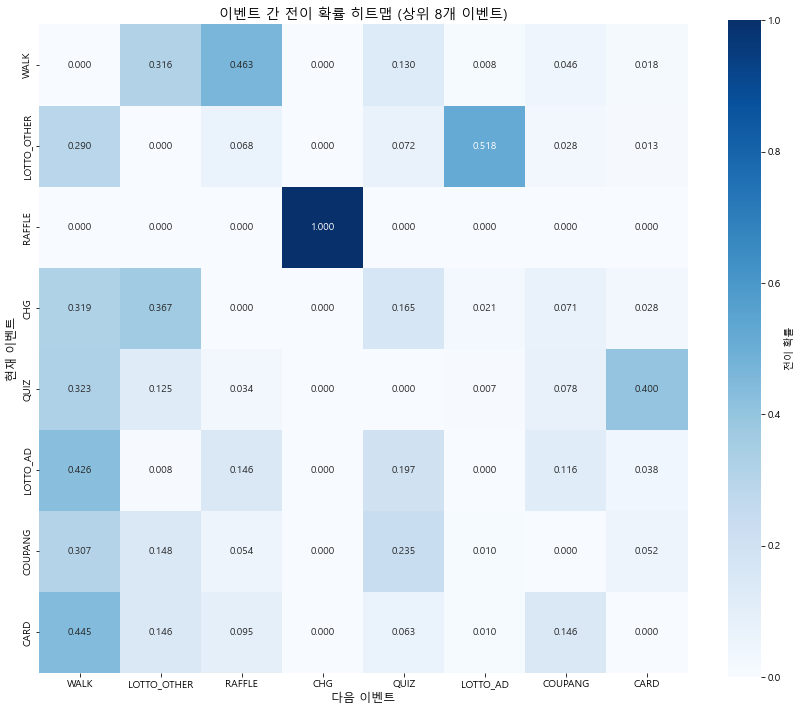

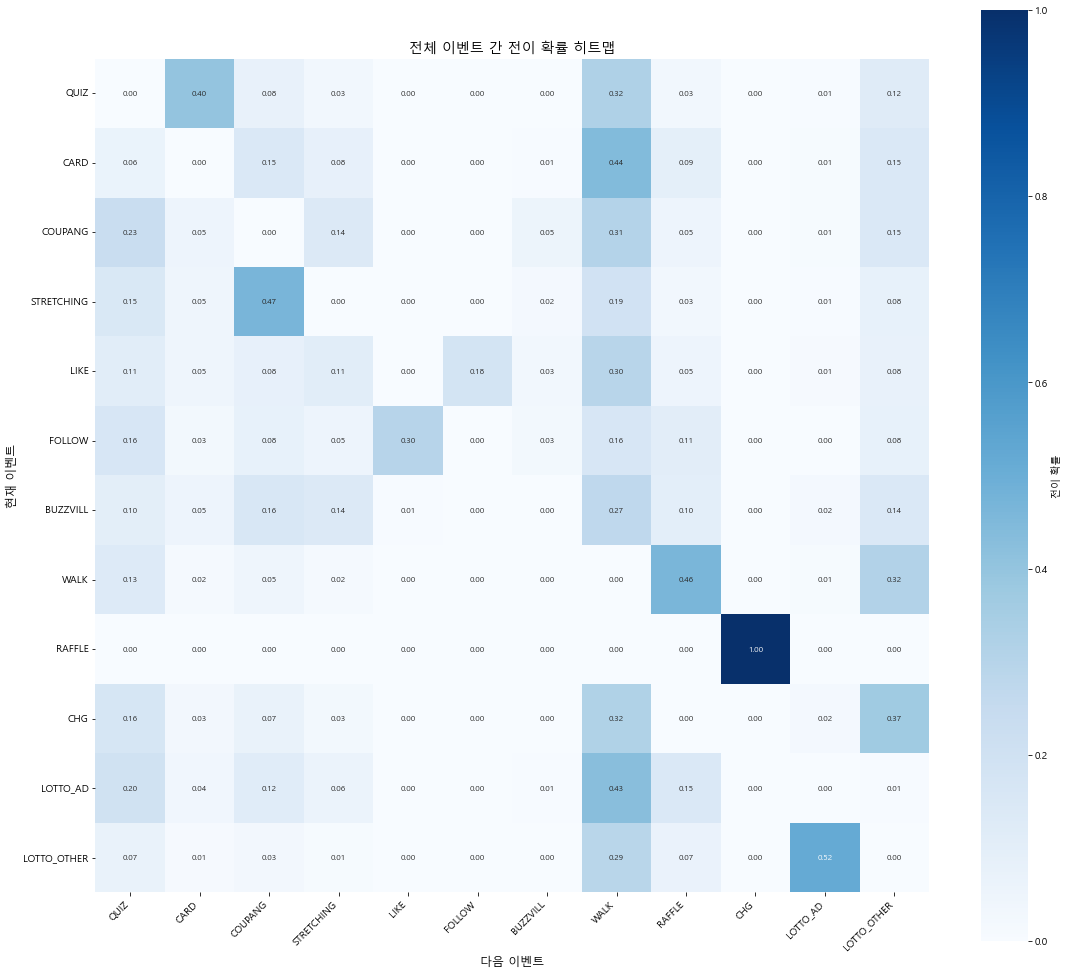

In [72]:
# 4. Ï†ÑÏù¥ ÌôïÎ•† ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
print("=== Ï†ÑÏù¥ ÌôïÎ•† ÌûàÌä∏Îßµ ===")

# ÏÉÅÏúÑ Ïù¥Î≤§Ìä∏Îì§Îßå ÏÑ†ÌÉùÌïòÏó¨ ÌûàÌä∏Îßµ ÏÉùÏÑ± (Í∞ÄÎèÖÏÑ±ÏùÑ ÏúÑÌï¥)
top_events = event_counts.head(8).index
transition_probs_subset = transition_probs.loc[top_events, top_events]

plt.figure(figsize=(12, 10))
sns.heatmap(transition_probs_subset, annot=True, fmt='.3f', cmap='Blues', 
            square=True, cbar_kws={'label': 'Ï†ÑÏù¥ ÌôïÎ•†'})
plt.title('Ïù¥Î≤§Ìä∏ Í∞Ñ Ï†ÑÏù¥ ÌôïÎ•† ÌûàÌä∏Îßµ (ÏÉÅÏúÑ 8Í∞ú Ïù¥Î≤§Ìä∏)', fontsize=14)
plt.xlabel('Îã§Ïùå Ïù¥Î≤§Ìä∏', fontsize=12)
plt.ylabel('ÌòÑÏû¨ Ïù¥Î≤§Ìä∏', fontsize=12)
plt.tight_layout()
plt.show()

# Ï†ÑÏ≤¥ Ï†ÑÏù¥ ÌñâÎ†¨ ÌûàÌä∏Îßµ (Îçî ÏûëÏùÄ Ìè∞Ìä∏Î°ú)
plt.figure(figsize=(16, 14))
sns.heatmap(transition_probs, annot=True, fmt='.2f', cmap='Blues', 
            square=True, cbar_kws={'label': 'Ï†ÑÏù¥ ÌôïÎ•†'}, 
            annot_kws={'size': 8})
plt.title('Ï†ÑÏ≤¥ Ïù¥Î≤§Ìä∏ Í∞Ñ Ï†ÑÏù¥ ÌôïÎ•† ÌûàÌä∏Îßµ', fontsize=14)
plt.xlabel('Îã§Ïùå Ïù¥Î≤§Ìä∏', fontsize=12)
plt.ylabel('ÌòÑÏû¨ Ïù¥Î≤§Ìä∏', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


=== Í∞ïÌôîÎêú Ïù¥Î≤§Ìä∏ Ï†ÑÏù¥ ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑ ===


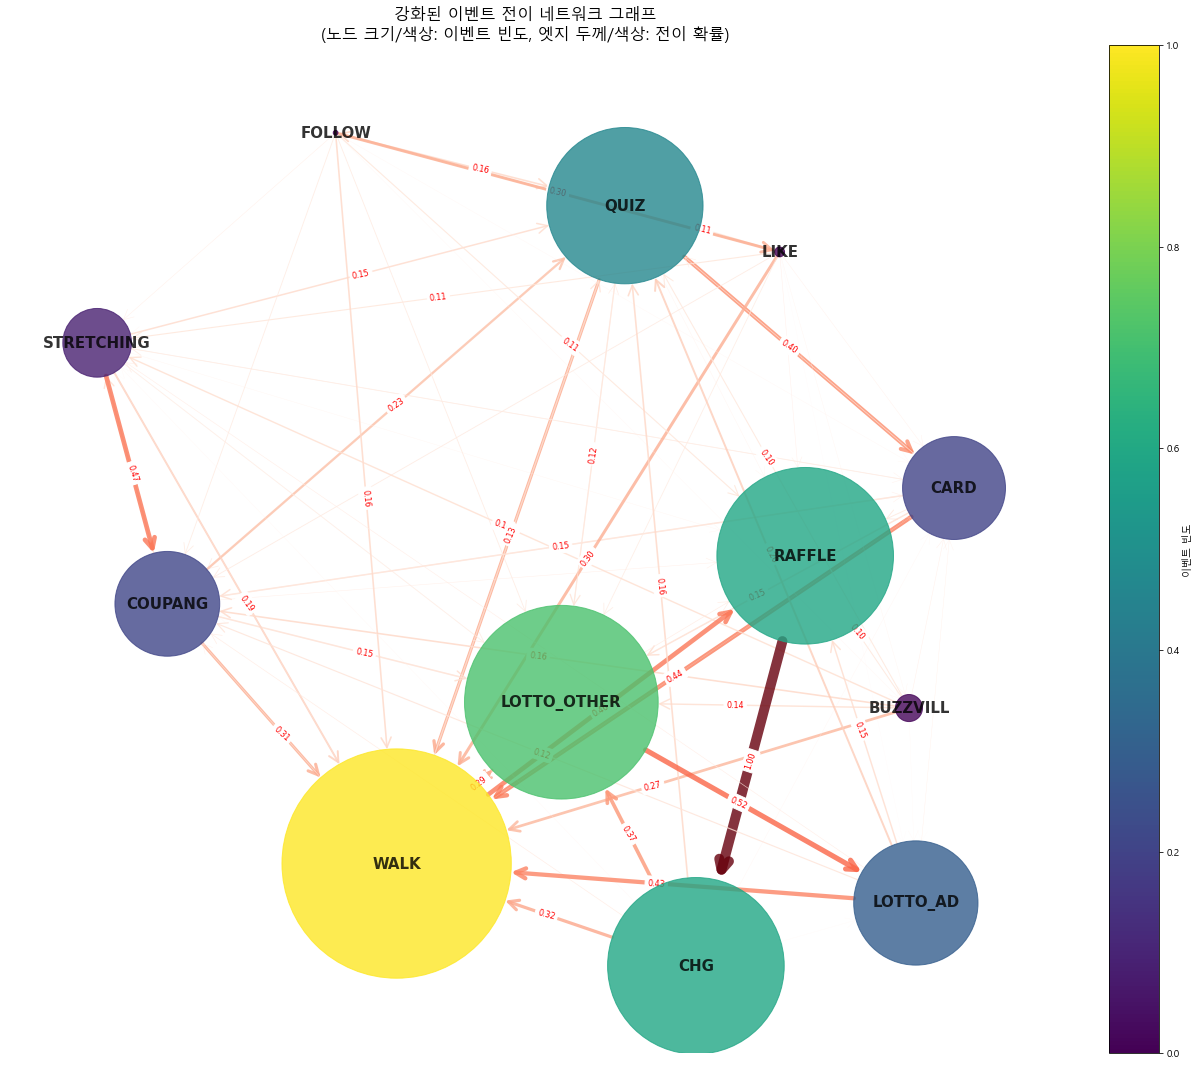


=== ÎÑ§Ìä∏ÏõåÌÅ¨ Î∂ÑÏÑù ===
Ï¥ù ÎÖ∏Îìú Ïàò: 12
Ï¥ù Ïó£ÏßÄ Ïàò: 81

ÎÇòÍ∞ÄÎäî Ïó∞Í≤∞ Ïàò ÏÉÅÏúÑ 5Í∞ú:
  LIKE: 10Í∞ú
  FOLLOW: 9Í∞ú
  BUZZVILL: 8Í∞ú
  CARD: 7Í∞ú
  COUPANG: 7Í∞ú

Îì§Ïñ¥Ïò§Îäî Ïó∞Í≤∞ Ïàò ÏÉÅÏúÑ 5Í∞ú:
  QUIZ: 10Í∞ú
  CARD: 10Í∞ú
  COUPANG: 10Í∞ú
  STRETCHING: 10Í∞ú
  WALK: 10Í∞ú

‚úÖ Í∞ïÌôîÎêú ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî ÏôÑÎ£å!


In [86]:
# Í∞ïÌôîÎêú ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑÎ°ú Ïù¥Î≤§Ìä∏ Ï†ÑÏù¥ ÏãúÍ∞ÅÌôî
print("=== Í∞ïÌôîÎêú Ïù¥Î≤§Ìä∏ Ï†ÑÏù¥ ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑ ===")

# NetworkX Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
G = nx.DiGraph()

# ÎÖ∏Îìú Ï∂îÍ∞Ä (Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖÎì§)
for event in all_events:
    G.add_node(event)

# Ïó£ÏßÄ Ï∂îÍ∞Ä (Ï†ÑÏù¥ ÌôïÎ•†Ïù¥ 0.01Î≥¥Îã§ ÌÅ∞ Í≤ΩÏö∞Îßå, Í∞ÄÎèÖÏÑ±ÏùÑ ÏúÑÌï¥)
for from_event in all_events:
    for to_event in all_events:
        prob = transition_probs.loc[from_event, to_event]
        if prob > 0.01:  # ÏûÑÍ≥ÑÍ∞í ÏÑ§Ï†ï
            G.add_edge(from_event, to_event, weight=prob)

# Í∞ïÌôîÎêú ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(18, 14))

# Î†àÏù¥ÏïÑÏõÉ ÏµúÏ†ÅÌôî
pos = nx.spring_layout(G, k=3, iterations=200, seed=42)

# ÎÖ∏Îìú ÌÅ¨Í∏∞ÏôÄ ÏÉâÏÉÅ (Ïù¥Î≤§Ìä∏ ÎπàÎèÑ Í∏∞Î∞ò)
node_sizes = [event_counts[event] * 0.4 for event in G.nodes()]
node_colors = [event_counts[event] for event in G.nodes()]

# Ïó£ÏßÄ ÎëêÍªòÏôÄ ÏÉâÏÉÅ (Ï†ÑÏù¥ ÌôïÎ•† Í∏∞Î∞ò)
edges = G.edges(data=True)
edge_weights = [edge[2]['weight'] * 10 for edge in edges]
edge_colors = [edge[2]['weight'] for edge in edges]

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
nx.draw(G, pos, 
        node_size=node_sizes,
        node_color=node_colors,
        cmap='viridis',
        edge_color=edge_colors,
        edge_cmap=plt.cm.Reds,
        width=edge_weights,
        with_labels=True,
        font_size=15,
        font_weight='bold',
        arrows=True,
        arrowsize=25,
        arrowstyle='->',
        alpha=0.8)

# Ïó£ÏßÄ ÎùºÎ≤® (Ï†ÑÏù¥ ÌôïÎ•†) Ï∂îÍ∞Ä
edge_labels = {}
for edge in edges:
    if edge[2]['weight'] > 0.1:  # 5% Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞Îßå ÌëúÏãú
        edge_labels[(edge[0], edge[1])] = f"{edge[2]['weight']:.2f}"

nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8, font_color='red')

plt.title('Í∞ïÌôîÎêú Ïù¥Î≤§Ìä∏ Ï†ÑÏù¥ ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑ\n(ÎÖ∏Îìú ÌÅ¨Í∏∞/ÏÉâÏÉÅ: Ïù¥Î≤§Ìä∏ ÎπàÎèÑ, Ïó£ÏßÄ ÎëêÍªò/ÏÉâÏÉÅ: Ï†ÑÏù¥ ÌôïÎ•†)', fontsize=16)
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label='Ïù¥Î≤§Ìä∏ ÎπàÎèÑ')
plt.tight_layout()
plt.show()

# ÎÑ§Ìä∏ÏõåÌÅ¨ Î∂ÑÏÑù
print("\n=== ÎÑ§Ìä∏ÏõåÌÅ¨ Î∂ÑÏÑù ===")
print(f"Ï¥ù ÎÖ∏Îìú Ïàò: {G.number_of_nodes()}")
print(f"Ï¥ù Ïó£ÏßÄ Ïàò: {G.number_of_edges()}")

# ÎÇòÍ∞ÄÎäî Ïó∞Í≤∞ Ïàò ÏÉÅÏúÑ 5Í∞ú
out_degrees = dict(G.out_degree())
print("\nÎÇòÍ∞ÄÎäî Ïó∞Í≤∞ Ïàò ÏÉÅÏúÑ 5Í∞ú:")
out_degree_sorted = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)
for event, degree in out_degree_sorted[:5]:
    print(f"  {event}: {degree}Í∞ú")

# Îì§Ïñ¥Ïò§Îäî Ïó∞Í≤∞ Ïàò ÏÉÅÏúÑ 5Í∞ú
in_degrees = dict(G.in_degree())
print("\nÎì§Ïñ¥Ïò§Îäî Ïó∞Í≤∞ Ïàò ÏÉÅÏúÑ 5Í∞ú:")
in_degree_sorted = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)
for event, degree in in_degree_sorted[:5]:
    print(f"  {event}: {degree}Í∞ú")

print("\n‚úÖ Í∞ïÌôîÎêú ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî ÏôÑÎ£å!")

In [88]:
# 6. ÏÇ¨Ïö©Ïûê ÌñâÎèô Ìå®ÌÑ¥ Î∂ÑÏÑù
print("=== ÏÇ¨Ïö©Ïûê ÌñâÎèô Ìå®ÌÑ¥ Î∂ÑÏÑù ===")

# Í∞ÄÏû• ÏùºÎ∞òÏ†ÅÏù∏ ÏãúÌÄÄÏä§ Ìå®ÌÑ¥ Ï∞æÍ∏∞
def get_sequence_patterns(sequences, min_length=2, max_length=4):
    """ÏãúÌÄÄÏä§ÏóêÏÑú Ìå®ÌÑ¥ÏùÑ Ï∂îÏ∂úÌïòÎäî Ìï®Ïàò"""
    patterns = []
    for sequence in sequences:
        for length in range(min_length, min(max_length + 1, len(sequence) + 1)):
            for i in range(len(sequence) - length + 1):
                pattern = tuple(sequence[i:i+length])
                patterns.append(pattern)
    return patterns

# 2-4 Í∏∏Ïù¥Ïùò Ìå®ÌÑ¥ Ï∂îÏ∂ú
all_sequences = user_sequences['event_sequence'].tolist()
patterns = get_sequence_patterns(all_sequences, min_length=2, max_length=4)

# Ìå®ÌÑ¥ ÎπàÎèÑ Í≥ÑÏÇ∞
pattern_counts = Counter(patterns)

print("Í∞ÄÏû• ÎπàÎ≤àÌïú 2-Í∏∏Ïù¥ Ìå®ÌÑ¥ (ÏÉÅÏúÑ 15Í∞ú):")
count_2 = 0
for pattern, count in pattern_counts.most_common(50):
    if len(pattern) == 2 and count_2 < 15:
        print(f"{' -> '.join(pattern)}: {count:,}Ìöå")
        count_2 += 1

print("\nÍ∞ÄÏû• ÎπàÎ≤àÌïú 3-Í∏∏Ïù¥ Ìå®ÌÑ¥ (ÏÉÅÏúÑ 10Í∞ú):")
count_3 = 0
for pattern, count in pattern_counts.most_common(100):
    if len(pattern) == 3 and count_3 < 10:
        print(f"{' -> '.join(pattern)}: {count:,}Ìöå")
        count_3 += 1

# ÌäπÏ†ï Ïù¥Î≤§Ìä∏Îì§Ïùò Ï†ÑÌôò Í≤ΩÎ°ú Î∂ÑÏÑù
print("\n=== ÌäπÏ†ï Ïù¥Î≤§Ìä∏ Ï†ÑÌôò Í≤ΩÎ°ú Î∂ÑÏÑù ===")

# LOTTO_OTHER Ïù¥Î≤§Ìä∏ Ï†ÑÌõÑ Î∂ÑÏÑù
if 'CARD' in df['event_type'].values:
    lotto_sequences = []
    for _, row in user_sequences.iterrows():
        sequence = row['event_sequence']
        if 'CARD' in sequence:
            lotto_idx = sequence.index('CARD')
            # CARD Ïù¥Ï†ÑÍ≥º Ïù¥ÌõÑÏùò Ïù¥Î≤§Ìä∏Îì§
            before_lotto = sequence[:lotto_idx] if lotto_idx > 0 else ['start']
            after_lotto = sequence[lotto_idx+1:] if lotto_idx < len(sequence)-1 else ['end']
            lotto_sequences.append((before_lotto[-1] if before_lotto else 'start', 
                                 'CARD', 
                                 after_lotto[0] if after_lotto else 'end'))
    
    if lotto_sequences:
        print(f"CARD Ïù¥Î≤§Ìä∏Î•º Ìïú ÏÇ¨Ïö©Ïûê Ïàò: {len(lotto_sequences):,}")
        
        # CARD Ïù¥Ï†Ñ Ïù¥Î≤§Ìä∏ Î∂ÑÏÑù
        before_events = [seq[0] for seq in lotto_sequences]
        before_counts = Counter(before_events)
        print("\nCARD Ïù¥Ï†Ñ Ïù¥Î≤§Ìä∏:")
        for event, count in before_counts.most_common(5):
            print(f"{event}: {count:,}Ìöå ({count/len(lotto_sequences)*100:.1f}%)")
        
        # CARD Ïù¥ÌõÑ Ïù¥Î≤§Ìä∏ Î∂ÑÏÑù
        after_events = [seq[2] for seq in lotto_sequences]
        after_counts = Counter(after_events)
        print("\nCARD_OTHER Ïù¥ÌõÑ Ïù¥Î≤§Ìä∏:")
        for event, count in after_counts.most_common(5):
            print(f"{event}: {count:,}Ìöå ({count/len(lotto_sequences)*100:.1f}%)")


=== ÏÇ¨Ïö©Ïûê ÌñâÎèô Ìå®ÌÑ¥ Î∂ÑÏÑù ===
Í∞ÄÏû• ÎπàÎ≤àÌïú 2-Í∏∏Ïù¥ Ìå®ÌÑ¥ (ÏÉÅÏúÑ 15Í∞ú):
RAFFLE -> CHG: 77,981Ìöå
WALK -> RAFFLE: 43,547Ìöå
LOTTO_OTHER -> LOTTO_AD: 36,386Ìöå
WALK -> LOTTO_OTHER: 29,761Ìöå
LOTTO_OTHER -> WALK: 20,374Ìöå
QUIZ -> CARD: 19,916Ìöå
QUIZ -> WALK: 16,087Ìöå
WALK -> QUIZ: 12,199Ìöå
CHG -> LOTTO_OTHER: 10,599Ìöå
CHG -> WALK: 9,200Ìöå
CARD -> WALK: 8,495Ìöå
LOTTO_AD -> WALK: 8,371Ìöå
QUIZ -> LOTTO_OTHER: 6,214Ìöå
COUPANG -> WALK: 5,162Ìöå
LOTTO_OTHER -> QUIZ: 5,053Ìöå

Í∞ÄÏû• ÎπàÎ≤àÌïú 3-Í∏∏Ïù¥ Ìå®ÌÑ¥ (ÏÉÅÏúÑ 10Í∞ú):
WALK -> RAFFLE -> CHG: 43,547Ìöå
RAFFLE -> CHG -> LOTTO_OTHER: 10,599Ìöå
WALK -> LOTTO_OTHER -> LOTTO_AD: 9,817Ìöå
RAFFLE -> CHG -> WALK: 9,200Ìöå
LOTTO_OTHER -> LOTTO_AD -> WALK: 8,200Ìöå
QUIZ -> CARD -> WALK: 7,233Ìöå
LOTTO_OTHER -> RAFFLE -> CHG: 4,800Ìöå
RAFFLE -> CHG -> QUIZ: 4,749Ìöå
CHG -> LOTTO_OTHER -> LOTTO_AD: 4,506Ìöå
LOTTO_OTHER -> WALK -> RAFFLE: 4,273Ìöå

=== ÌäπÏ†ï Ïù¥Î≤§Ìä∏ Ï†ÑÌôò Í≤ΩÎ°ú Î∂ÑÏÑù ===
CARD Ïù¥Î≤§Ìä∏Î•º Ìïú ÏÇ¨Ïö©Ïûê Ïàò

=== ÏãúÍ∞ÑÎåÄÎ≥Ñ Ïù¥Î≤§Ìä∏ Î∂ÑÏÑù ===


<Figure size 1152x720 with 0 Axes>

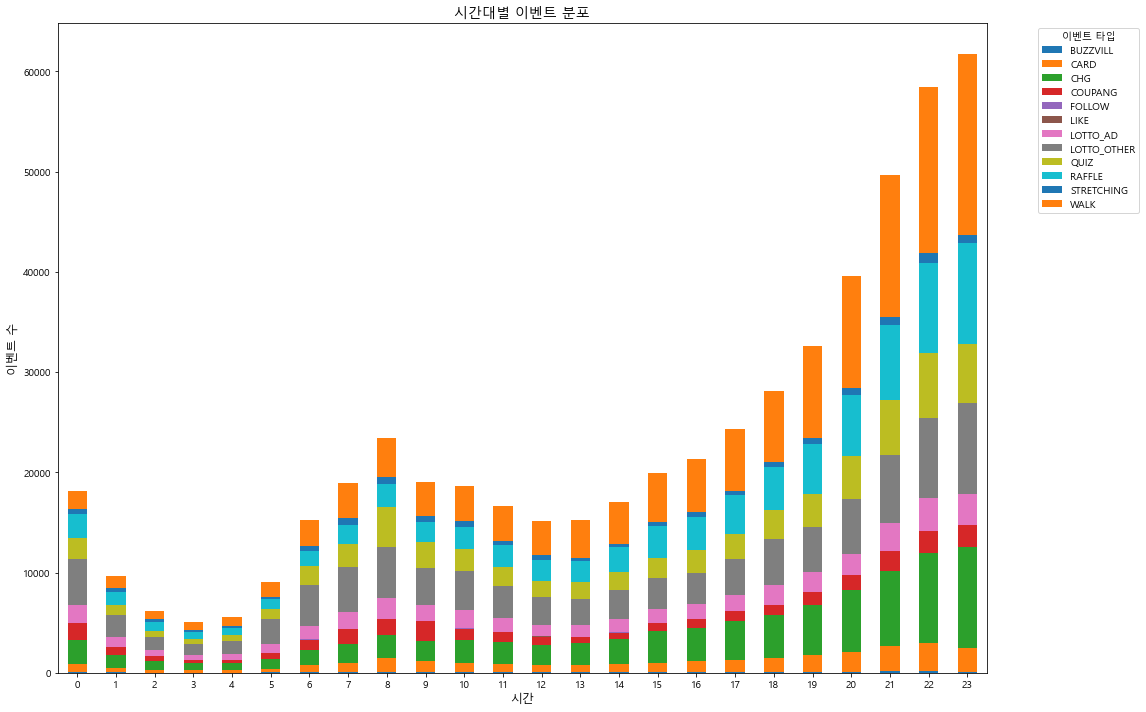

<Figure size 1008x576 with 0 Axes>

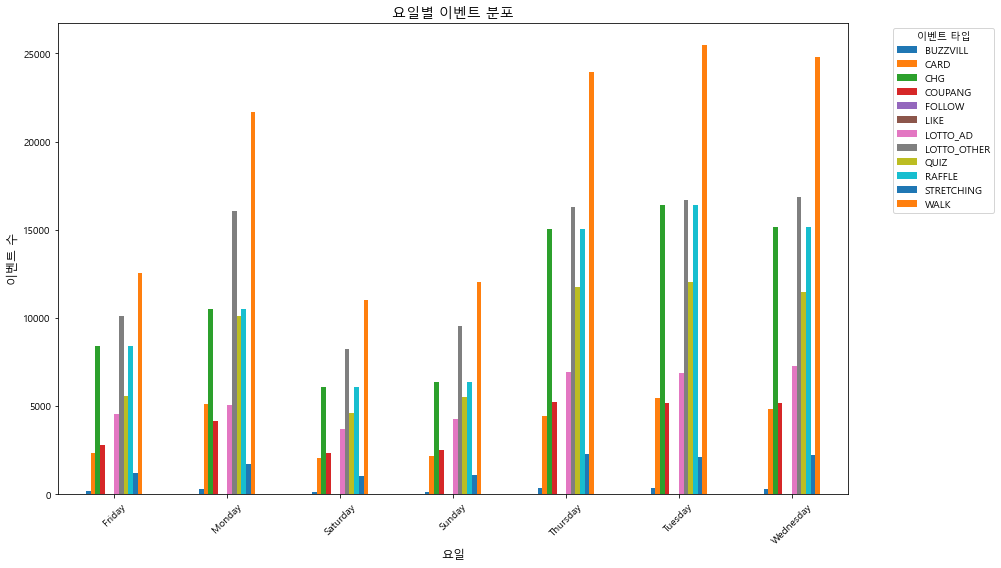

ÏãúÍ∞ÑÎåÄÎ≥Ñ Ïù¥Î≤§Ìä∏ ÌÜµÍ≥Ñ:
Í∞ÄÏû• ÌôúÎ∞úÌïú ÏãúÍ∞ÑÎåÄ: 23Ïãú (61,776Í∞ú Ïù¥Î≤§Ìä∏)
Í∞ÄÏû• Ï°∞Ïö©Ìïú ÏãúÍ∞ÑÎåÄ: 3Ïãú (5,032Í∞ú Ïù¥Î≤§Ìä∏)
ÌèâÍ∑† ÏãúÍ∞ÑÎåÄÎ≥Ñ Ïù¥Î≤§Ìä∏ Ïàò: 22866


In [75]:
# 7. ÏãúÍ∞ÑÎåÄÎ≥Ñ Ïù¥Î≤§Ìä∏ Î∂ÑÏÑù
print("=== ÏãúÍ∞ÑÎåÄÎ≥Ñ Ïù¥Î≤§Ìä∏ Î∂ÑÏÑù ===")

# ÏãúÍ∞ÑÎåÄ Ïª¨Îüº Ï∂îÍ∞Ä
df['hour'] = df['event_dttm'].dt.hour
df['day_of_week'] = df['event_dttm'].dt.day_name()
df['date'] = df['event_dttm'].dt.date

# ÏãúÍ∞ÑÎåÄÎ≥Ñ Ïù¥Î≤§Ìä∏ Î∂ÑÌè¨
hourly_events = df.groupby('hour')['event_type'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(16, 10))
hourly_events.plot(kind='bar', stacked=True, figsize=(16, 10))
plt.title('ÏãúÍ∞ÑÎåÄÎ≥Ñ Ïù¥Î≤§Ìä∏ Î∂ÑÌè¨', fontsize=14)
plt.xlabel('ÏãúÍ∞Ñ', fontsize=12)
plt.ylabel('Ïù¥Î≤§Ìä∏ Ïàò', fontsize=12)
plt.legend(title='Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖ', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ÏöîÏùºÎ≥Ñ Ïù¥Î≤§Ìä∏ Î∂ÑÌè¨
daily_events = df.groupby('day_of_week')['event_type'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
daily_events.plot(kind='bar', figsize=(14, 8))
plt.title('ÏöîÏùºÎ≥Ñ Ïù¥Î≤§Ìä∏ Î∂ÑÌè¨', fontsize=14)
plt.xlabel('ÏöîÏùº', fontsize=12)
plt.ylabel('Ïù¥Î≤§Ìä∏ Ïàò', fontsize=12)
plt.legend(title='Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖ', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌÜµÍ≥Ñ
print("ÏãúÍ∞ÑÎåÄÎ≥Ñ Ïù¥Î≤§Ìä∏ ÌÜµÍ≥Ñ:")
hourly_stats = df.groupby('hour').size()
print(f"Í∞ÄÏû• ÌôúÎ∞úÌïú ÏãúÍ∞ÑÎåÄ: {hourly_stats.idxmax()}Ïãú ({hourly_stats.max():,}Í∞ú Ïù¥Î≤§Ìä∏)")
print(f"Í∞ÄÏû• Ï°∞Ïö©Ìïú ÏãúÍ∞ÑÎåÄ: {hourly_stats.idxmin()}Ïãú ({hourly_stats.min():,}Í∞ú Ïù¥Î≤§Ìä∏)")
print(f"ÌèâÍ∑† ÏãúÍ∞ÑÎåÄÎ≥Ñ Ïù¥Î≤§Ìä∏ Ïàò: {hourly_stats.mean():.0f}")


In [79]:
# 11. Î∂ÑÏÑù Í≤∞Í≥º ÏöîÏïΩ Î∞è Ïù∏ÏÇ¨Ïù¥Ìä∏
print("=== ÌÅ¥Î¶≠Ïä§Ìä∏Î¶º Î∂ÑÏÑù Í≤∞Í≥º ÏöîÏïΩ ===")

print("üìä Í∏∞Î≥∏ ÌÜµÍ≥Ñ:")
print(f"‚Ä¢ Ï¥ù Ïù¥Î≤§Ìä∏ Ïàò: {len(df):,}")
print(f"‚Ä¢ Í≥†Ïú† ÏÇ¨Ïö©Ïûê Ïàò: {df['user_seq'].nunique():,}")
print(f"‚Ä¢ Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖ Ïàò: {df['event_type'].nunique()}")
print(f"‚Ä¢ Î∂ÑÏÑù Í∏∞Í∞Ñ: {df['event_dt'].min()} ~ {df['event_dt'].max()}")

print("\nüéØ Ï£ºÏöî Ïù∏ÏÇ¨Ïù¥Ìä∏:")
print(f"‚Ä¢ Í∞ÄÏû• ÎπàÎ≤àÌïú Ïù¥Î≤§Ìä∏: {event_counts.index[0]} ({event_counts.iloc[0]:,}Ìöå, {event_counts.iloc[0]/len(df)*100:.1f}%)")
print(f"‚Ä¢ ÌèâÍ∑† ÏãúÌÄÄÏä§ Í∏∏Ïù¥: {user_sequences['event_sequence'].apply(len).mean():.1f}")
print(f"‚Ä¢ Í∞ÄÏû• Í∞ïÌïú Ï†ÑÏù¥: {transition_probs.stack().idxmax()[0]} ‚Üí {transition_probs.stack().idxmax()[1]} ({transition_probs.stack().max():.3f})")

print("\nüìà ÏãúÍ∞ÑÎåÄÎ≥Ñ Ìå®ÌÑ¥:")
peak_hour = df.groupby('hour').size().idxmax()
print(f"‚Ä¢ Í∞ÄÏû• ÌôúÎ∞úÌïú ÏãúÍ∞ÑÎåÄ: {peak_hour}Ïãú")

print("\nüîç ÏÇ¨Ïö©Ïûê ÌñâÎèô Ìå®ÌÑ¥:")
if len(pattern_counts) > 0:
    most_common_pattern = pattern_counts.most_common(1)[0]
    print(f"‚Ä¢ Í∞ÄÏû• ÎπàÎ≤àÌïú Ìå®ÌÑ¥: {' ‚Üí '.join(most_common_pattern[0])} ({most_common_pattern[1]:,}Ìöå)")

print("\nüí° ÎπÑÏ¶àÎãàÏä§ Ïù∏ÏÇ¨Ïù¥Ìä∏:")
print(f"‚Ä¢ LOTTO_OTHER ÏÇ¨Ïö©Ïûê ÎπÑÏú®: {len(user_lotto)/len(user_stats)*100:.1f}%")
print(f"‚Ä¢ RAFFLE ÏÇ¨Ïö©Ïûê ÎπÑÏú®: {len(user_raffle)/len(user_stats)*100:.1f}%")
print(f"‚Ä¢ QUIZ ÏÇ¨Ïö©Ïûê ÎπÑÏú®: {len(user_quiz)/len(user_stats)*100:.1f}%")
print(f"‚Ä¢ WALK ÏÇ¨Ïö©Ïûê ÎπÑÏú®: {len(user_walk)/len(user_stats)*100:.1f}%")

# ÏÉÅÏúÑ Ïù¥Î≤§Ìä∏Îì§Ïùò ÏÇ¨Ïö©Ïûê Ï∞∏Ïó¨ÎèÑ
print("\nüìä Ïù¥Î≤§Ìä∏Î≥Ñ ÏÇ¨Ïö©Ïûê Ï∞∏Ïó¨ÎèÑ:")
for i, (event, count) in enumerate(event_counts.head(5).items()):
    users = df[df['event_type'] == event]['user_seq'].nunique()
    print(f"{i+1}. {event}: {users:,}Î™Ö ({users/df['user_seq'].nunique()*100:.1f}%)")

print("\n‚úÖ Î∂ÑÏÑù ÏôÑÎ£å!")
print("Ïù¥ Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ ÏÇ¨Ïö©ÏûêÏùò ÌñâÎèô Ìå®ÌÑ¥, Ï†ÑÌôò Í≤ΩÎ°ú, ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌäπÏÑ±ÏùÑ ÌååÏïÖÌï† Ïàò ÏûàÏäµÎãàÎã§.")
print("Ï∂îÍ∞ÄÎ°ú ÌïÑÏöîÌïú Î∂ÑÏÑùÏù¥ ÏûàÎã§Î©¥ ÎßêÏîÄÌï¥ Ï£ºÏÑ∏Ïöî!")


=== ÌÅ¥Î¶≠Ïä§Ìä∏Î¶º Î∂ÑÏÑù Í≤∞Í≥º ÏöîÏïΩ ===
üìä Í∏∞Î≥∏ ÌÜµÍ≥Ñ:
‚Ä¢ Ï¥ù Ïù¥Î≤§Ìä∏ Ïàò: 548,779
‚Ä¢ Í≥†Ïú† ÏÇ¨Ïö©Ïûê Ïàò: 43,181
‚Ä¢ Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖ Ïàò: 12
‚Ä¢ Î∂ÑÏÑù Í∏∞Í∞Ñ: 2025-09-08 ~ 2025-09-19

üéØ Ï£ºÏöî Ïù∏ÏÇ¨Ïù¥Ìä∏:
‚Ä¢ Í∞ÄÏû• ÎπàÎ≤àÌïú Ïù¥Î≤§Ìä∏: WALK (131,482Ìöå, 24.0%)
‚Ä¢ ÌèâÍ∑† ÏãúÌÄÄÏä§ Í∏∏Ïù¥: 3.4
‚Ä¢ Í∞ÄÏû• Í∞ïÌïú Ï†ÑÏù¥: RAFFLE ‚Üí CHG (1.000)

üìà ÏãúÍ∞ÑÎåÄÎ≥Ñ Ìå®ÌÑ¥:
‚Ä¢ Í∞ÄÏû• ÌôúÎ∞úÌïú ÏãúÍ∞ÑÎåÄ: 23Ïãú

üîç ÏÇ¨Ïö©Ïûê ÌñâÎèô Ìå®ÌÑ¥:
‚Ä¢ Í∞ÄÏû• ÎπàÎ≤àÌïú Ìå®ÌÑ¥: RAFFLE ‚Üí CHG (77,981Ìöå)

üí° ÎπÑÏ¶àÎãàÏä§ Ïù∏ÏÇ¨Ïù¥Ìä∏:
‚Ä¢ LOTTO_OTHER ÏÇ¨Ïö©Ïûê ÎπÑÏú®: 39.3%
‚Ä¢ RAFFLE ÏÇ¨Ïö©Ïûê ÎπÑÏú®: 88.6%
‚Ä¢ QUIZ ÏÇ¨Ïö©Ïûê ÎπÑÏú®: 32.8%
‚Ä¢ WALK ÏÇ¨Ïö©Ïûê ÎπÑÏú®: 55.9%

üìä Ïù¥Î≤§Ìä∏Î≥Ñ ÏÇ¨Ïö©Ïûê Ï∞∏Ïó¨ÎèÑ:
1. WALK: 24,138Î™Ö (55.9%)
2. LOTTO_OTHER: 16,981Î™Ö (39.3%)
3. RAFFLE: 38,268Î™Ö (88.6%)
4. CHG: 38,268Î™Ö (88.6%)
5. QUIZ: 14,151Î™Ö (32.8%)

‚úÖ Î∂ÑÏÑù ÏôÑÎ£å!
Ïù¥ Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ ÏÇ¨Ïö©ÏûêÏùò ÌñâÎèô Ìå®ÌÑ¥, Ï†ÑÌôò Í≤ΩÎ°ú, ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌäπÏÑ±ÏùÑ ÌååÏïÖÌï† Ïàò Ïûà

In [92]:
transition_probs_subset

event_type       WALK  LOTTO_OTHER    RAFFLE  CHG      QUIZ  LOTTO_AD  \
event_type                                                              
WALK         0.000000     0.316297  0.462813  0.0  0.129650  0.008045   
LOTTO_OTHER  0.289819     0.000000  0.068280  0.0  0.071879  0.517589   
RAFFLE       0.000000     0.000000  0.000000  1.0  0.000000  0.000000   
CHG          0.318780     0.367256  0.000000  0.0  0.164553  0.020790   
QUIZ         0.322902     0.124729  0.034303  0.0  0.000000  0.006784   
LOTTO_AD     0.426287     0.007588  0.145643  0.0  0.196771  0.000000   
COUPANG      0.306824     0.148241  0.054387  0.0  0.234784  0.009570   
CARD         0.444741     0.146327  0.094602  0.0  0.063033  0.010261   
STRETCHING   0.194736     0.078150  0.031330  0.0  0.151642  0.006988   
BUZZVILL     0.272618     0.144753  0.100121  0.0  0.102533  0.021713   
LIKE         0.296774     0.077419  0.051613  0.0  0.109677  0.012903   
FOLLOW       0.162162     0.081081  0.108108  0.0  0.162162  0.000000   

event_type    COUPANG      CARD  STRETCHING  BUZZVILL      LIKE    FOLLOW  
event_type                                                                 
WALK         0.046295  0.018121    0.016622  0.001849  0.000255  0.000053  
LOTTO_OTHER  0.027838  0.013187    0.010384  0.000882  0.000128  0.000014  
RAFFLE       0.000000  0.000000    0.000000  0.000000  0.000000  0.000000  
CHG          0.070790  0.028378    0.025156  0.003430  0.000797  0.000069  
QUIZ         0.077860  0.399759    0.031895  0.001485  0.000261  0.000020  
LOTTO_AD     0.116158  0.038091    0.061720  0.006722  0.000968  0.000051  
COUPANG      0.000000  0.051534    0.138374  0.054981  0.001248  0.000059  
CARD         0.146170  0.000000    0.083503  0.007382  0.003665  0.000314  
STRETCHING   0.468553  0.046471    0.000000  0.020615  0.001281  0.000233  
BUZZVILL     0.159228  0.051870    0.139928  0.000000  0.006031  0.001206  
LIKE         0.083871  0.045161    0.109677  0.032258  0.000000  0.180645  
FOLLOW       0.081081  0.027027    0.054054  0.027027  0.297297  0.000000

In [93]:
pattern_3_probs

{('WALK', 'LOTTO_OTHER', 'WALK'): {'probability': 0.0,
  'count': 0,
  'total_from_middle': 13658},
 ('WALK', 'LOTTO_OTHER', 'LOTTO_OTHER'): {'probability': 0.0,
  'count': 0,
  'total_from_middle': 13658},
 ('WALK', 'LOTTO_OTHER', 'RAFFLE'): {'probability': 0.08756772587494509,
  'count': 1196,
  'total_from_middle': 13658},
 ('WALK', 'LOTTO_OTHER', 'CHG'): {'probability': 0.0,
  'count': 0,
  'total_from_middle': 13658},
 ('WALK', 'LOTTO_OTHER', 'QUIZ'): {'probability': 0.10733635964270025,
  'count': 1466,
  'total_from_middle': 13658},
 ('WALK', 'LOTTO_OTHER', 'LOTTO_AD'): {'probability': 0.7187728803631571,
  'count': 9817,
  'total_from_middle': 13658},
 ('WALK', 'LOTTO_OTHER', 'COUPANG'): {'probability': 0.05022697320251867,
  'count': 686,
  'total_from_middle': 13658},
 ('WALK', 'LOTTO_OTHER', 'CARD'): {'probability': 0.01603455850051252,
  'count': 219,
  'total_from_middle': 13658},
 ('WALK', 'LOTTO_OTHER', 'STRETCHING'): {'probability': 0.018304290525699225,
  'count': 250,

=== ÏãúÌÄÄÏä§ ÌôïÎ•† Ìëú Ï†ïÎ¶¨ ===

üìä 2-Í∏∏Ïù¥ ÏãúÌÄÄÏä§ ÌôïÎ•† Ìëú (A‚ÜíB)
From         To           Probability  Count   
------------------------------------------------------------
WALK         LOTTO_OTHER  0.316        29761   
WALK         RAFFLE       0.463        43547   
WALK         QUIZ         0.130        12199   
WALK         LOTTO_AD     0.008        757     
WALK         COUPANG      0.046        4356    
WALK         CARD         0.018        1705    
WALK         STRETCHING   0.017        1564    
WALK         BUZZVILL     0.002        174     
WALK         LIKE         0.000        24      
WALK         FOLLOW       0.000        5       
LOTTO_OTHER  WALK         0.290        20374   
LOTTO_OTHER  RAFFLE       0.068        4800    
LOTTO_OTHER  QUIZ         0.072        5053    
LOTTO_OTHER  LOTTO_AD     0.518        36386   
LOTTO_OTHER  COUPANG      0.028        1957    
LOTTO_OTHER  CARD         0.013        927     
LOTTO_OTHER  STRETCHING   0.010        730 

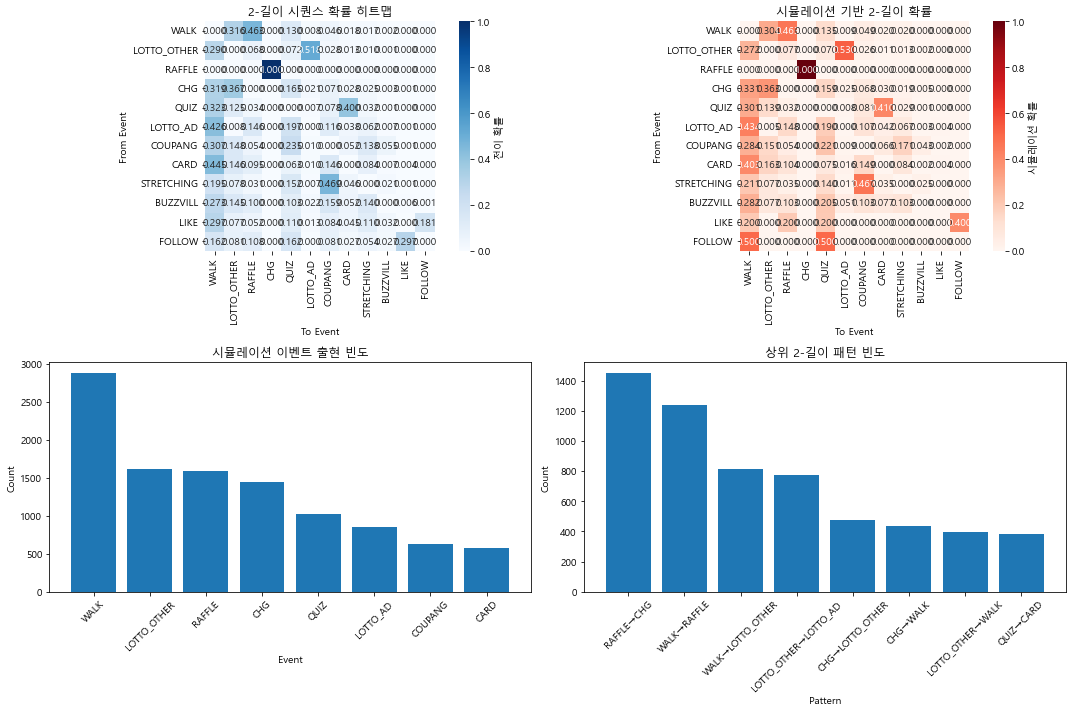


‚úÖ ÏãúÌÄÄÏä§ ÌôïÎ•† Ìëú Ï†ïÎ¶¨ ÏôÑÎ£å!


In [95]:
# 13. ÏãúÌÄÄÏä§ ÌôïÎ•† Ìëú Ï†ïÎ¶¨
print("=== ÏãúÌÄÄÏä§ ÌôïÎ•† Ìëú Ï†ïÎ¶¨ ===")

# 1. 2-Í∏∏Ïù¥ ÏãúÌÄÄÏä§ (A‚ÜíB) ÌôïÎ•† Ìëú
print("\nüìä 2-Í∏∏Ïù¥ ÏãúÌÄÄÏä§ ÌôïÎ•† Ìëú (A‚ÜíB)")
print("=" * 60)

# Ï†ÑÏù¥ ÌôïÎ•† ÌñâÎ†¨ÏóêÏÑú ÏÉÅÏúÑ Ïù¥Î≤§Ìä∏Îì§Îßå ÏÑ†ÌÉù
top_events = event_counts.head(20).index
transition_probs_subset = transition_probs.loc[top_events, top_events]

# 2-Í∏∏Ïù¥ ÏãúÌÄÄÏä§ ÌôïÎ•† Ìëú ÏÉùÏÑ±
print(f"{'From':<12} {'To':<12} {'Probability':<12} {'Count':<8}")
print("-" * 60)

for from_event in top_events:
    for to_event in top_events:
        prob = transition_probs_subset.loc[from_event, to_event]
        if prob > 0:  # ÌôïÎ•†Ïù¥ 0Î≥¥Îã§ ÌÅ∞ Í≤ΩÏö∞Îßå ÌëúÏãú
            count = transition_counts.loc[from_event, to_event]
            print(f"{from_event:<12} {to_event:<12} {prob:<12.3f} {count:<8}")

# 2. 3-Í∏∏Ïù¥ ÏãúÌÄÄÏä§ (A‚ÜíB‚ÜíC) ÌôïÎ•† Ìëú
print("\nüìä 3-Í∏∏Ïù¥ ÏãúÌÄÄÏä§ ÌôïÎ•† Ìëú (A‚ÜíB‚ÜíC)")
print("=" * 80)

# 3-Í∏∏Ïù¥ Ìå®ÌÑ¥ ÌôïÎ•† Í≥ÑÏÇ∞
def calculate_3_length_probabilities(sequences, top_events):
    """3-Í∏∏Ïù¥ ÏãúÌÄÄÏä§ ÌôïÎ•† Í≥ÑÏÇ∞"""
    pattern_probs = {}
    
    for from_event in top_events:
        for middle_event in top_events:
            for to_event in top_events:
                pattern = (from_event, middle_event, to_event)
                
                # Ìï¥Îãπ Ìå®ÌÑ¥Ïùò Ï∂úÌòÑ ÌöüÏàò Í≥ÑÏÇ∞
                count = 0
                total_from_middle = 0
                
                for seq in sequences:
                    for i in range(len(seq) - 2):
                        if seq[i] == from_event and seq[i+1] == middle_event:
                            total_from_middle += 1
                            if seq[i+2] == to_event:
                                count += 1
                
                if total_from_middle > 0:
                    prob = count / total_from_middle
                    pattern_probs[pattern] = {
                        'probability': prob,
                        'count': count,
                        'total_from_middle': total_from_middle
                    }
    
    return pattern_probs

# Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ÏóêÏÑú 3-Í∏∏Ïù¥ ÌôïÎ•† Í≥ÑÏÇ∞
pattern_3_probs = calculate_3_length_probabilities(user_sequences['event_sequence'].tolist(), top_events)

print(f"{'From':<12} {'Middle':<12} {'To':<12} {'Probability':<12} {'Count':<8} {'Total':<8}")
print("-" * 80)

# ÌôïÎ•† ÏàúÏúºÎ°ú Ï†ïÎ†¨ÌïòÏó¨ ÌëúÏãú
sorted_patterns = sorted(pattern_3_probs.items(), key=lambda x: x[1]['probability'], reverse=True)

for pattern, data in sorted_patterns[:20]:  # ÏÉÅÏúÑ 20Í∞úÎßå ÌëúÏãú
    from_event, middle_event, to_event = pattern
    prob = data['probability']
    count = data['count']
    total = data['total_from_middle']
    
    if prob > 0:
        print(f"{from_event:<12} {middle_event:<12} {to_event:<12} {prob:<12.3f} {count:<8} {total:<8}")

# 3. ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º Í∏∞Î∞ò ÌôïÎ•† Ìëú
print("\nüìä ÏãúÎÆ¨Î†àÏù¥ÏÖò Í∏∞Î∞ò ÏãúÌÄÄÏä§ ÌôïÎ•† Ìëú")
print("=" * 60)

# ÏãúÎÆ¨Î†àÏù¥ÏÖòÏóêÏÑú 2-Í∏∏Ïù¥ Ìå®ÌÑ¥ ÌôïÎ•†
print("2-Í∏∏Ïù¥ Ìå®ÌÑ¥ (ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º):")
print(f"{'Pattern':<20} {'Count':<8} {'Probability':<12}")
print("-" * 50)

for pattern, count in pattern_2_counts.most_common(15):
    prob = count / len(patterns_2) * 100
    pattern_str = f"{pattern[0]} ‚Üí {pattern[1]}"
    print(f"{pattern_str:<20} {count:<8} {prob:<12.2f}%")

# ÏãúÎÆ¨Î†àÏù¥ÏÖòÏóêÏÑú 3-Í∏∏Ïù¥ Ìå®ÌÑ¥ ÌôïÎ•†
print("\n3-Í∏∏Ïù¥ Ìå®ÌÑ¥ (ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º):")
print(f"{'Pattern':<30} {'Count':<8} {'Probability':<12}")
print("-" * 60)

for pattern, count in pattern_3_counts.most_common(15):
    prob = count / len(patterns_3) * 100
    pattern_str = f"{pattern[0]} ‚Üí {pattern[1]} ‚Üí {pattern[2]}"
    print(f"{pattern_str:<30} {count:<8} {prob:<12.2f}%")

# 4. ÌäπÏ†ï Ïù¥Î≤§Ìä∏ÏóêÏÑú ÏãúÏûëÌïòÎäî ÏãúÌÄÄÏä§ ÌôïÎ•†
print("\nüìä ÌäπÏ†ï Ïù¥Î≤§Ìä∏ ÏãúÏûë ÏãúÌÄÄÏä§ ÌôïÎ•†")
print("=" * 50)

start_events = ['WALK', 'LOTTO_OTHER', 'RAFFLE', 'QUIZ']
for start_event in start_events:
    if start_event in top_events:
        print(f"\n{start_event}ÏóêÏÑú ÏãúÏûëÌïòÎäî ÏãúÌÄÄÏä§:")
        print(f"{'Next Event':<15} {'Probability':<12} {'Count':<8}")
        print("-" * 40)
        
        # Ìï¥Îãπ Ïù¥Î≤§Ìä∏ÏóêÏÑúÏùò Ï†ÑÏù¥ ÌôïÎ•†
        next_events = transition_probs_subset.loc[start_event].sort_values(ascending=False)
        for next_event, prob in next_events.items():
            if prob > 0:
                count = transition_counts.loc[start_event, next_event]
                print(f"{next_event:<15} {prob:<12.3f} {count:<8}")

# 5. ÏãúÌÄÄÏä§ ÌôïÎ•† ÌûàÌä∏Îßµ
print("\nüìä ÏãúÌÄÄÏä§ ÌôïÎ•† ÌûàÌä∏Îßµ")
print("=" * 40)

# 2-Í∏∏Ïù¥ ÏãúÌÄÄÏä§ ÌôïÎ•† ÌûàÌä∏Îßµ
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.heatmap(transition_probs_subset, annot=True, fmt='.3f', cmap='Blues', 
            square=True, cbar_kws={'label': 'Ï†ÑÏù¥ ÌôïÎ•†'})
plt.title('2-Í∏∏Ïù¥ ÏãúÌÄÄÏä§ ÌôïÎ•† ÌûàÌä∏Îßµ')
plt.xlabel('To Event')
plt.ylabel('From Event')

# ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º ÌûàÌä∏Îßµ
plt.subplot(2, 2, 2)
# ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥ºÎ•º ÌñâÎ†¨ ÌòïÌÉúÎ°ú Î≥ÄÌôò
sim_matrix = pd.DataFrame(0, index=top_events, columns=top_events)
for pattern, count in pattern_2_counts.items():
    if pattern[0] in top_events and pattern[1] in top_events:
        sim_matrix.loc[pattern[0], pattern[1]] = count

# ÌôïÎ•†Î°ú Î≥ÄÌôò
sim_prob_matrix = sim_matrix.div(sim_matrix.sum(axis=1), axis=0).fillna(0)
sns.heatmap(sim_prob_matrix, annot=True, fmt='.3f', cmap='Reds', 
            square=True, cbar_kws={'label': 'ÏãúÎÆ¨Î†àÏù¥ÏÖò ÌôïÎ•†'})
plt.title('ÏãúÎÆ¨Î†àÏù¥ÏÖò Í∏∞Î∞ò 2-Í∏∏Ïù¥ ÌôïÎ•†')
plt.xlabel('To Event')
plt.ylabel('From Event')

# Ïù¥Î≤§Ìä∏ Ï∂úÌòÑ ÎπàÎèÑ
plt.subplot(2, 2, 3)
event_names = [event for event, _ in event_simulation_counts.most_common(8)]
event_counts_sim = [count for _, count in event_simulation_counts.most_common(8)]
plt.bar(event_names, event_counts_sim)
plt.title('ÏãúÎÆ¨Î†àÏù¥ÏÖò Ïù¥Î≤§Ìä∏ Ï∂úÌòÑ ÎπàÎèÑ')
plt.xlabel('Event')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Ìå®ÌÑ¥ ÎπàÎèÑ
plt.subplot(2, 2, 4)
top_patterns = [f"{p[0]}‚Üí{p[1]}" for p, _ in pattern_2_counts.most_common(8)]
top_pattern_counts = [count for _, count in pattern_2_counts.most_common(8)]
plt.bar(range(len(top_patterns)), top_pattern_counts)
plt.title('ÏÉÅÏúÑ 2-Í∏∏Ïù¥ Ìå®ÌÑ¥ ÎπàÎèÑ')
plt.xlabel('Pattern')
plt.ylabel('Count')
plt.xticks(range(len(top_patterns)), top_patterns, rotation=45)

plt.tight_layout()
plt.show()

print("\n‚úÖ ÏãúÌÄÄÏä§ ÌôïÎ•† Ìëú Ï†ïÎ¶¨ ÏôÑÎ£å!")
